## Day 50 Lecture 2 Assignment

In this assignment, we will apply various methods of internal evaluation to the results of K-Means clustering on a dataset containing the results of a survey on financial wellbeing.

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

This dataset contains the results of a survey on a financial wellbeing conducted by the US Consumer Finance Protection Bureau that were published in October 2017. This dataset has a large number of columns, most of which correspond to specific questions on the survey. These codebook for translating the column names to questions can be found here:

https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

Load the dataset.

In [12]:
# answer goes here

fin_well = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/financial_wellbeing.csv')

As we did in the previous assignment, we will only use the score columns. Filter the columns of the dataset to only include these columns.

In [14]:
# answer goes here

X = fin_well.filter(regex='score')
X

,FWBscore,FSscore,LMscore,KHscore
0,55,44,3,1.267
1,51,43,3,-0.570
2,49,42,3,-0.188
3,49,42,2,-1.485
4,49,42,1,-1.900
...,...,...,...,...
6389,61,47,3,1.267
6390,59,59,1,-1.215
6391,59,51,2,-1.215
6392,46,54,2,-1.215


Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [15]:
# answer goes here

scaler = StandardScaler()

X_std = scaler.fit_transform(X)

Create an elbow plot showing how the SSE changes with respect to the number of clusters in K-Means. Allow K to vary from 2 to 30. Does a clear "elbow" emerge from the plot?

In [30]:
# answer goes here

from sklearn import metrics


y_preds = pd.DataFrame()
inertias = pd.Series(index=range(2,31))

for nclusts in range(2, 31):
    k_means = KMeans(n_clusters=nclusts)
    preds = k_means.fit_predict(X_std)
    y_preds['{}_clusters'.format(nclusts)] = preds
    inertias[nclusts] = k_means.inertia_

y_preds
    

,2_clusters,3_clusters,4_clusters,5_clusters,6_clusters,7_clusters,8_clusters,9_clusters,10_clusters,11_clusters,...,21_clusters,22_clusters,23_clusters,24_clusters,25_clusters,26_clusters,27_clusters,28_clusters,29_clusters,30_clusters
0,1,1,0,1,1,3,0,0,4,0,...,2,21,21,16,20,22,9,17,17,17
1,0,1,2,2,3,0,6,6,8,10,...,7,15,18,10,24,24,14,26,0,19
2,1,1,2,2,3,0,4,6,8,10,...,7,0,4,10,4,2,3,7,22,7
3,0,2,1,0,5,4,1,8,7,1,...,10,4,9,1,2,6,1,2,15,4
4,0,2,1,0,2,1,5,1,9,5,...,5,2,5,12,19,1,15,25,9,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,1,0,0,1,1,3,0,0,3,4,...,19,12,7,16,0,8,4,14,7,26
6390,0,2,1,4,2,5,5,5,2,2,...,4,3,17,20,8,5,8,5,2,5
6391,0,2,1,4,0,5,3,2,7,1,...,13,5,15,8,17,14,12,11,12,25
6392,0,2,1,4,0,4,1,8,7,1,...,10,5,15,8,17,14,12,2,15,25


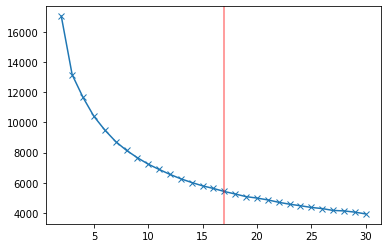

In [43]:
plt.plot(inertias, marker='x')
plt.axvline(17, color='r', alpha=.5)
plt.show()

This particular elbow plot didn't have much of an elbow. Perhaps it'd be better to look at silhouettes.

Create a silhouette plot for the results of K-Means, again with K varying from 2 to 30. What is the optimal number of clusters according to the silhouette method? Is this consistent with the output of the elbow plot?

In [33]:
silhouettes = pd.Series(index=range(2,31))
for nclusts in range(2, 31):
    silhouettes[nclusts] = metrics.silhouette_score(X_std, y_preds['{}_clusters'.format(nclusts)])

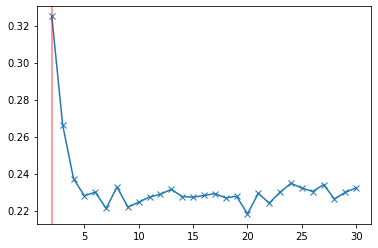

In [46]:
plt.plot(silhouettes, marker='x')
plt.axvline(2, color='r', alpha=.5)
plt.show()

This output is inconsistent with the elbow plot. This means consideration needs to be taken as far as which metric better describes my model accuracy